In [1]:
import os
import time
import requests
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
def show_image(image_path):
    
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    
    cleaned_path = image_path.strip("\u202a")

    img = mpimg.imread(cleaned_path)
    fig, ax = plt.subplots(figsize=(10, 9))
    ax.imshow(img)
    ax.axis('off')  
    plt.show()

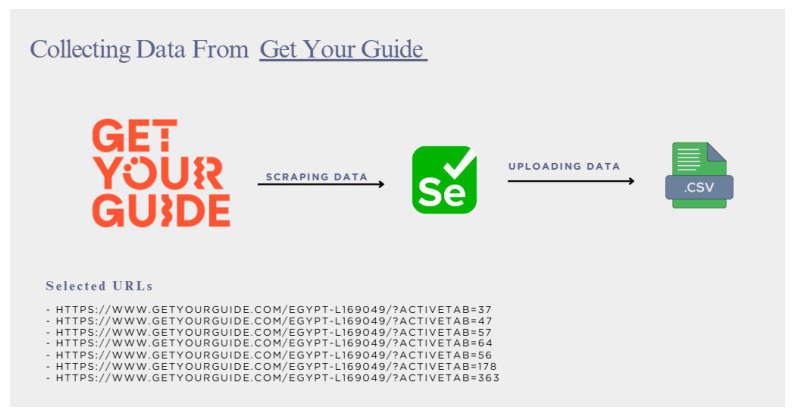

In [4]:
show_image(r"F:\Egyptopia\Activities Scrap\Logo\scrappingDiagram.png")

## Scrapping Desert Safaris

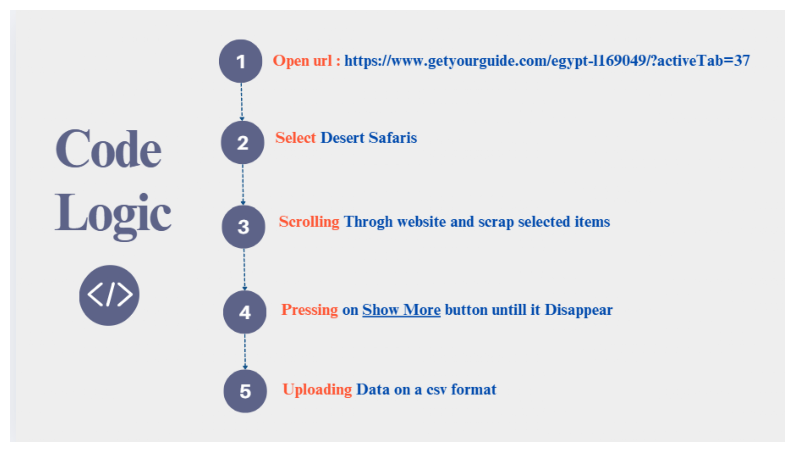

In [5]:
show_image(r"‪F:\Egyptopia\Activities Scrap\Logo\SafriCodeLogic.png")

In [9]:
# Browser Preparation
options = Options()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

try:
    
    url = "https://www.getyourguide.com/egypt-l169049/?activeTab=37"
    driver.get(url)
    time.sleep(5)

    ## Pressing on Show more button untill it disappear 
    while True:
        try:
            show_more_button = driver.find_element(By.XPATH, '//button[span[contains(text(), "Show more")]]')
            driver.execute_script("arguments[0].click();", show_more_button)
            time.sleep(8) 
        except:
            break 
            
    # Data Extraction
    activities = driver.find_elements(By.XPATH, '//div[@id="activities-grid"]//h3')
    images = driver.find_elements(By.XPATH, '//div[@id="activities-grid"]//img[@class="c-image__img c-image__img--crop"]')
    ratings = driver.find_elements(By.XPATH, '//div[@id="activities-grid"]//div[contains(@class, "c-activity-rating__rating")]')
    price_blocks = driver.find_elements(By.XPATH, '//div[@id="activities-grid"]//footer/div[2]')  
    links = driver.find_elements(By.XPATH, '//div[@id="activities-grid"]//article/div/a')

    # Price Cleaning
    clean_prices = []
    for price in price_blocks:
        price_text = price.text.strip()
        actual_price = price_text if price_text else "N/A"
        clean_prices.append(actual_price)

    # Integration Checking
    if not (len(activities) == len(images) == len(ratings) == len(clean_prices) == len(links)):
        print("Handling Integration in Data")

    # Saving Collected Images
    save_path = r"‪F:\Egyptopia\Activities Scrap\Safari\Safari images".strip("\u202a")
    os.makedirs(save_path, exist_ok=True)

    # Saving Data in a Dataframe
    data = []
    for i in range(len(activities)):
        try:
            title = activities[i].text.strip()
            rating = ratings[i].text.strip() if i < len(ratings) else "N/A"
            price = clean_prices[i] if i < len(clean_prices) else "N/A"
            link = links[i].get_attribute("href") if i < len(links) else "N/A"
            image_url = images[i].get_attribute("src")

            # Image Loading and Saving
            img_extension = image_url.split('.')[-1].split('?')[0]  # Extracting The Right Extension
            img_filename = f"{title}.{img_extension}".replace(":", "").replace("?", "").replace("/", "").replace("\\", "")
            img_path = os.path.join(save_path, img_filename)

            img_data = requests.get(image_url).content
            with open(img_path, 'wb') as img_file:
                img_file.write(img_data)

            print(f"✅ {title} - Image Saved")

            # Adding collected data to Data list
            data.append((title, rating, price, link))

        except Exception as e:
            print(f"❌ error with {title}: {e}")

    # Creating Dataframe and uplaoding it in a cvs format
    safari_data = pd.DataFrame(data, columns=["Title", "Rating", "Price", "Link"])
    print("\n Data Extracted and uploaded ✔")

finally:
    driver.quit()

Handling Integration in Data
✅ Sharm El-Sheikh: Ultimate ATV Quad, Stargazing & BBQ Dinner - Image Saved
✅ Hurghada: Desert Quad Bike Camel Ride with Optional GoPro - Image Saved
✅ Giza Sunrise Pyramid Guided Tour With Camel Ride & Breakfast - Image Saved
✅ Hurghada: VIP Quad, Sea, Camel, Safari, Stargazing & Dinner - Image Saved
✅ Hurghada: Sunset Quad Bike, Camel w/ Opt Stargazing and BBQ - Image Saved
✅ Hurghada: Star Stargazing Desert Adventure by Jeep & Dinner - Image Saved
✅ Sharm ElSheikh: ATV Quad & Buggy Adventure Sunrise or Sunset - Image Saved
✅ Hurghada: Desert Quad Bike and Buggy Adventure with Transfer - Image Saved
✅ Pyramids of Giza: 1-Hour Quad Bike Desert Safari - Image Saved
✅ Hurghada: Quad Bike, Buggy, and Camel Ride & Bedouin Village - Image Saved
✅ Hurghada: Quad Bike Tour of the Desert and Red Sea - Image Saved
✅ From Cairo: Desert Safari, Camel Ride, Magic Lake, & Lunch - Image Saved
✅ Cairo: 2-Day Bahariya Oasis Camp and Desert Tour - Image Saved
✅ Cairo: Pyra

In [10]:
safari_data = safari_data[~safari_data.eq("N/A").any(axis=1)]

In [11]:
safari_data

,Title,Rating,Price,Link
0,"Sharm El-Sheikh: Ultimate ATV Quad, Stargazing...",4.8,"From\nE£2,001\nFrom\nE£1,000\nper person",https://www.getyourguide.com/sharm-el-sheikh-l...
1,Hurghada: Desert Quad Bike Camel Ride with Opt...,4.5,From\nE£886\nFrom\nE£443\nper person,https://www.getyourguide.com/hurghada-l403/hur...
2,Giza Sunrise Pyramid Guided Tour With Camel Ri...,4.8,"From\nE£2,046\nFrom\nE£1,023\nper person",https://www.getyourguide.com/cairo-l92/giza-su...
3,"Hurghada: VIP Quad, Sea, Camel, Safari, Starga...",4.3,From\nE£545\nFrom\nE£327\nper person,https://www.getyourguide.com/hurghada-l403/hur...
4,"Hurghada: Sunset Quad Bike, Camel w/ Opt Starg...",4.4,From\nE£852\nFrom\nE£511\nper person,https://www.getyourguide.com/hurghada-l403/sun...
...,...,...,...,...
115,"Hurghada: 4 Days Tour Horse, Camel, Spa, ATV, ...",4.3,"From\nE£1,580\nper person",https://www.getyourguide.com/makadi-bay-l4675/...
116,Sharm El Sheikh: Quad Biking trip with Authent...,4,"From\nE£2,182\nFrom\nE£1,309\nper person",https://www.getyourguide.com/sharm-el-sheikh-l...
117,Desert Safari Around The Pyramids of Giza With...,5,"From\nE£3,423\nper person",https://www.getyourguide.com/giza-governorate-...
118,"Makadi Bay: 2H Quad Bike, Camel, Stargazing, D...",4.5,"From\nE£2,264\nper person",https://www.getyourguide.com/makadi-bay-l4675/...


In [12]:
safari_data.to_csv("safari_data.csv", index=False, encoding="utf-8")

## Scrapping Ballon Tours Data

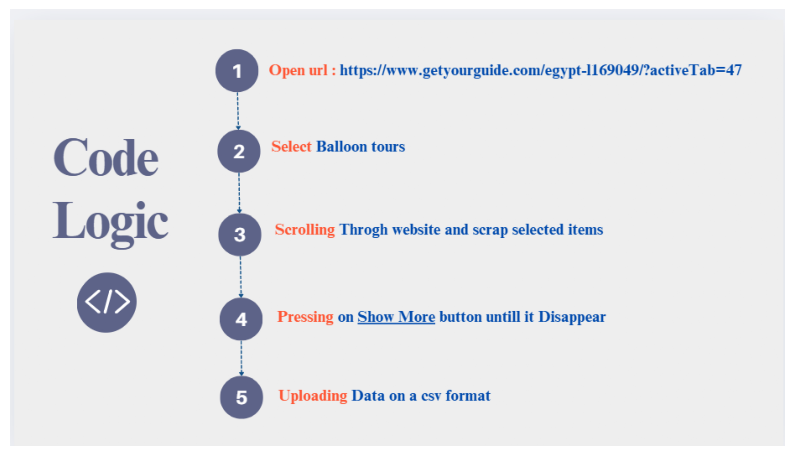

In [13]:
show_image(r"‪F:\Egyptopia\Activities Scrap\Logo\ballonToursData.png")

In [15]:
# Browser Preparation
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

try:
    url = "https://www.getyourguide.com/egypt-l169049/?activeTab=47"
    driver.get(url)

    # Wating for page loading
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//div[@id="activities-grid"]'))
    )

    # Pressing on show more button
    while True:
        try:
            show_more_button = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.XPATH, '//button[span[contains(text(), "Show more")]]'))
            )
            driver.execute_script("arguments[0].click();", show_more_button)
            time.sleep(3)
        except:
            break  

    # Data Extraction by Xpath
    activities = driver.find_elements(By.XPATH, '//div[@id="activities-grid"]//h3')
    images = driver.find_elements(By.XPATH, '//div[@id="activities-grid"]//img[@class="c-image__img c-image__img--crop"]')
    ratings = driver.find_elements(By.XPATH, '//div[@id="activities-grid"]//div[contains(@class, "c-activity-rating__rating")]')
    links = driver.find_elements(By.XPATH, '//div[@id="activities-grid"]//article/div/a')

    # Extracting price 
    price_blocks = driver.find_elements(By.XPATH, '//div[@id="activities-grid"]//footer/div[2]')

    clean_prices = []
    for price in price_blocks:
        try:
            price_text = price.text.strip()
            if "E£" in price_text:  
                clean_prices.append(price_text)
            else:
                clean_prices.append("N/A")
        except:
            clean_prices.append("N/A")

    # Ratings Cleaning 
    clean_ratings = [rating.text.strip() if rating.text.strip() else "N/A" for rating in ratings]

    # Checking Data Integrity 
    if not (len(activities) == len(images) == len(clean_prices) == len(links)):
        print("Handling Integration in Data")

    # Images Saving
    save_path = r"F:\Egyptopia\Activities Scrap\Balloon tours\Balloon tours images"
    os.makedirs(save_path, exist_ok=True)

    # Saving Data 
    data = []
    for i in range(len(activities)):
        try:
            title = activities[i].text.strip()
            rating = clean_ratings[i] if i < len(clean_ratings) else "N/A"
            price = clean_prices[i] if i < len(clean_prices) else "N/A"
            link = links[i].get_attribute("href") if i < len(links) else "N/A"
            image_url = images[i].get_attribute("src")

            # Image Loading and Saving
            img_extension = image_url.split('.')[-1].split('?')[0]
            img_filename = f"{title}.{img_extension}".replace(":", "").replace("?", "").replace("/", "").replace("\\", "")
            img_path = os.path.join(save_path, img_filename)

            img_data = requests.get(image_url).content
            with open(img_path, 'wb') as img_file:
                img_file.write(img_data)

            print(f"✅ {title} - Image Saved")

            # Adding collected data to Data List 
            data.append((title, rating, price, link))

        except Exception as e:
            print(f"❌ error in {title}: {e}")

    # Creating df
    ballon_tours_data = pd.DataFrame(data, columns=["Title", "Rating", "Price", "Link"])    
    print("\n Data Collected Successfully!")

finally:
    driver.quit()


✅ Luxor: Hot Air Balloon Ride over Luxor Relics - Image Saved
✅ Hurghada: Luxor Hot Air Balloon Ride and Day Tour With Meals - Image Saved
✅ Luxor: Morning Hot Air Balloon Ride - Image Saved
✅ Luxor: Hot Air Balloon Ride with Full-Day Sights Tour - Image Saved
✅ Hurghada: 2-Day Luxor Tour with Hotel, Balloon, & Boat Ride - Image Saved
✅ Hurghada: Luxor Highlights Private Tour & Balloon Ride - Image Saved
✅ Luxor: West Bank Hot Air Balloon Ride with Hotel Pickup - Image Saved
✅ Egypt: Private 5-Day Tour, Nile Cruise, Flights, Balloon - Image Saved
✅ From Cairo: Luxor & Hot Air Balloon Private Trip by Plane - Image Saved
✅ Luxor: Hot Air Balloon Ride over the Valley of the Kings - Image Saved
✅ From Cairo: 3-Day Nile Cruise with Hot Air Balloon & Flights - Image Saved
✅ Luxor: Amazing Sunrise Hot Air Balloon Ride - Image Saved
✅ Luxor: 2-Day West and East Bank with Lunch and Felucca Ride - Image Saved
✅ Hurghada: 2-Day Tour to Luxor with Balloon Ride and Hotel - Image Saved
✅ Luxor: Hot 

In [16]:
ballon_tours_data

,Title,Rating,Price,Link
0,Luxor: Hot Air Balloon Ride over Luxor Relics,4.9,"From\nE£4,681\nFrom\nE£3,277\nper person",https://www.getyourguide.com/luxor-l109/luxor-...
1,Hurghada: Luxor Hot Air Balloon Ride and Day T...,4.4,"From\nE£7,900\nper person",https://www.getyourguide.com/hurghada-l403/fro...
2,Luxor: Morning Hot Air Balloon Ride,4.4,"From\nE£2,896\nper person",https://www.getyourguide.com/luxor-l109/luxor-...
3,Luxor: Hot Air Balloon Ride with Full-Day Sigh...,5,"From\nE£8,427\nFrom\nE£4,634\nper person",https://www.getyourguide.com/luxor-l109/luxor-...
4,"Hurghada: 2-Day Luxor Tour with Hotel, Balloon...",4.5,"From\nE£13,167\nper person",https://www.getyourguide.com/luxor-l109/hurgha...
...,...,...,...,...
63,From Marsa Alam: 5-Day Egypt Tour with Nile Cr...,4.4,"From\nE£63,954\nper person",https://www.getyourguide.com/luxor-l109/from-m...
64,From Marsa Alam: 3 night Nile Cruise with Hot ...,4.4,"From\nE£56,430\nper person",https://www.getyourguide.com/luxor-l109/from-m...
65,"Hurghada:10-Day Egypt Tour, Nile Cruise, Ballo...",5,"From\nE£56,355\nper person",https://www.getyourguide.com/hurghada-l403/hur...
66,Marsa Alam: 4 Days Nile cruise to Aswan with h...,4.4,"From\nE£56,430\nper person",https://www.getyourguide.com/marsa-alam-l422/m...


In [17]:
ballon_tours_data = ballon_tours_data[~ballon_tours_data.eq("N/A").any(axis=1)]

In [18]:
ballon_tours_data

,Title,Rating,Price,Link
0,Luxor: Hot Air Balloon Ride over Luxor Relics,4.9,"From\nE£4,681\nFrom\nE£3,277\nper person",https://www.getyourguide.com/luxor-l109/luxor-...
1,Hurghada: Luxor Hot Air Balloon Ride and Day T...,4.4,"From\nE£7,900\nper person",https://www.getyourguide.com/hurghada-l403/fro...
2,Luxor: Morning Hot Air Balloon Ride,4.4,"From\nE£2,896\nper person",https://www.getyourguide.com/luxor-l109/luxor-...
3,Luxor: Hot Air Balloon Ride with Full-Day Sigh...,5,"From\nE£8,427\nFrom\nE£4,634\nper person",https://www.getyourguide.com/luxor-l109/luxor-...
4,"Hurghada: 2-Day Luxor Tour with Hotel, Balloon...",4.5,"From\nE£13,167\nper person",https://www.getyourguide.com/luxor-l109/hurgha...
...,...,...,...,...
63,From Marsa Alam: 5-Day Egypt Tour with Nile Cr...,4.4,"From\nE£63,954\nper person",https://www.getyourguide.com/luxor-l109/from-m...
64,From Marsa Alam: 3 night Nile Cruise with Hot ...,4.4,"From\nE£56,430\nper person",https://www.getyourguide.com/luxor-l109/from-m...
65,"Hurghada:10-Day Egypt Tour, Nile Cruise, Ballo...",5,"From\nE£56,355\nper person",https://www.getyourguide.com/hurghada-l403/hur...
66,Marsa Alam: 4 Days Nile cruise to Aswan with h...,4.4,"From\nE£56,430\nper person",https://www.getyourguide.com/marsa-alam-l422/m...


In [19]:
ballon_tours_data.to_csv("ballon_tours_data.csv", index=False, encoding="utf-8")

## Scrapping Swimming and Dolphins Tours

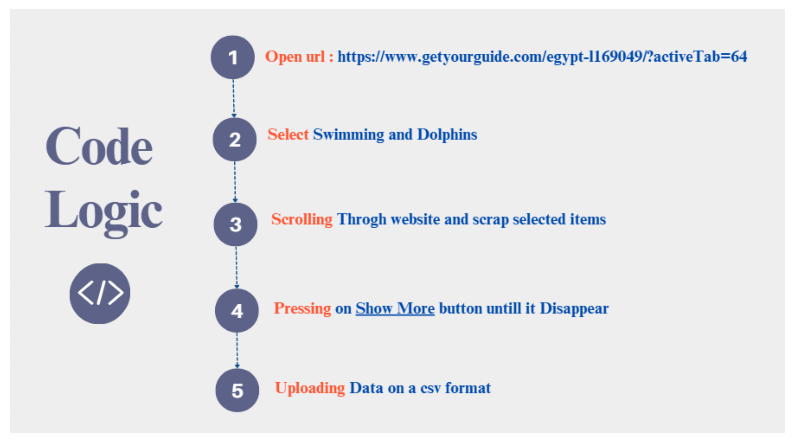

In [20]:
show_image(r"‪F:\Egyptopia\Activities Scrap\Logo\swimming_and_dolphins.png")

In [21]:
# Browser Preparation
options = Options()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

try:
    url = "https://www.getyourguide.com/egypt-l169049/?activeTab=64"
    driver.get(url)

    # Wating for page loading
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//div[@id="activities-grid"]'))
    )

    ## Pressing on show more button
    while True:
        try:
            show_more_button = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.XPATH, '//button[span[contains(text(), "Show more")]]'))
            )
            driver.execute_script("arguments[0].click();", show_more_button)
            time.sleep(3)
        except:
            break  

    # Data Extraction
    activities = driver.find_elements(By.XPATH, '//h3/span')
    images = driver.find_elements(By.XPATH, '//picture/img')
    ratings = driver.find_elements(By.XPATH, '//div[contains(@class, "c-activity-rating__rating")]')
    prices = driver.find_elements(By.XPATH, '//footer/div[2]')
    links = driver.find_elements(By.XPATH, '//article/div/a')

    # Showing the number of collected items
    print(f" total collected activities : {len(activities)}")
    print(f" total collected images  : {len(images)}")
    print(f" total collected ratings : {len(ratings)}")
    print(f" total collected prices  : {len(prices)}")
    print(f" total collected links : {len(links)}")

    # Checking Data Integration
    max_length = max(len(activities), len(images), len(ratings), len(prices), len(links))

    # Data Inspection and Cleaning
    clean_titles = [activities[i].text.strip() if i < len(activities) else "N/A" for i in range(max_length)]
    clean_images = [images[i].get_attribute("src") if i < len(images) else "N/A" for i in range(max_length)]
    clean_ratings = [ratings[i].text.strip() if i < len(ratings) else "N/A" for i in range(max_length)]
    clean_prices = [prices[i].text.strip() if i < len(prices) else "N/A" for i in range(max_length)]
    clean_links = [links[i].get_attribute("href") if i < len(links) else "N/A" for i in range(max_length)]

    # Image Saving
    save_path = r"F:\Egyptopia\Activities Scrap\Swimming and Dolphins\Swimming and Dolphins Images"
    os.makedirs(save_path, exist_ok=True)

    # Storing Data in DataFrame
    data = []
    for i in range(max_length):
        try:
            title = clean_titles[i]
            rating = clean_ratings[i]
            price = clean_prices[i]
            link = clean_links[i]
            image_url = clean_images[i]

            # Image loading and Saving
            if image_url != "N/A":
                img_extension = image_url.split('.')[-1].split('?')[0]
                img_filename = f"{title}.{img_extension}".replace(":", "").replace("?", "").replace("/", "").replace("\\", "")
                img_path = os.path.join(save_path, img_filename)

                img_data = requests.get(image_url).content
                with open(img_path, 'wb') as img_file:
                    img_file.write(img_data)

                print(f"✅ {title} - Image Saved")

            # Adding collected data to the Data List 
            data.append((title, rating, price, link))

        except Exception as e:
            print(f"❌ error in  {title}: {e}")

    # إنشاء DataFrame وحفظه في CSV
    swimming_and_dolphins = pd.DataFrame(data, columns=["Title", "Rating", "Price", "Link"])
    print("\n Data is collected successfully")

finally:
    driver.quit()

 total collected activities : 32
 total collected images  : 32
 total collected ratings : 32
 total collected prices  : 32
 total collected links : 32
✅ Hurghada or Makadi: Discover the Magic of Dolphin House - Image Saved
✅ Hurghada: Dolphin World Show with Walruses and Pickup - Image Saved
✅ Giza: Sakkara, Memphis & Dahshur (Pyramid & Felucca Options) - Image Saved
✅ Hurghada: Speedboat Dolphin Watching & Snorkeling with Lunch - Image Saved
✅ Hurghada: Dolphin Watching & Snorkeling Adventure with Lunch - Image Saved
✅ Hurghada: Dolphin House Discovery Cruise, Snorkeling & Lunch - Image Saved
✅ Giza: Pyramid, Memphis, Sakkara W/Opt Dahshur & Felucca Tour - Image Saved
✅ Cairo: Dinner Cruise on the Nile River - Image Saved
✅ Hurghada: Orange Bay & Snorkeling Adventure Experience - Image Saved
✅ Cairo: Salah El Din Citadel and Old Cairo Bazar Guided Tour - Image Saved
✅ Cairo: 1 or 2-Hour Felucca Ride on the Nile with Transfers - Image Saved
✅ Cairo/Giza: Egyptian Museum and Khan el-Kha

In [28]:
swimming_and_dolphins = swimming_and_dolphins[~swimming_and_dolphins.eq("N/A").any(axis=1)]

In [29]:
swimming_and_dolphins

,Title,Rating,Price,Link
0,Hurghada or Makadi: Discover the Magic of Dolp...,4.9,"From\nE£1,715\nFrom\nE£1,320\nper person",https://www.getyourguide.com/hurghada-l403/hur...
1,Hurghada: Dolphin World Show with Walruses and...,4.3,"From\nE£1,143\nper person",https://www.getyourguide.com/hurghada-l403/hur...
2,"Giza: Sakkara, Memphis & Dahshur (Pyramid & Fe...",4.8,"From\nE£1,364\nFrom\nE£682\nper person",https://www.getyourguide.com/cairo-l92/giza-sa...
3,Hurghada: Speedboat Dolphin Watching & Snorkel...,4.6,"From\nE£2,001\nFrom\nE£1,901\nper person",https://www.getyourguide.com/giftun-island-l45...
4,Hurghada: Dolphin Watching & Snorkeling Advent...,4.6,"From\nE£1,315\nFrom\nE£986\nper person",https://www.getyourguide.com/hurghada-l403/hur...
5,"Hurghada: Dolphin House Discovery Cruise, Snor...",4.3,"From\nE£1,023\nFrom\nE£511\nper person",https://www.getyourguide.com/hurghada-l403/hur...
6,"Giza: Pyramid, Memphis, Sakkara W/Opt Dahshur ...",4.7,"From\nE£1,023\nFrom\nE£511\nper person",https://www.getyourguide.com/cairo-l92/giza-py...
7,Cairo: Dinner Cruise on the Nile River,4.2,From\nE£682\nFrom\nE£341\nper person,https://www.getyourguide.com/cairo-l92/cairo-d...
8,Hurghada: Orange Bay & Snorkeling Adventure Ex...,4.8,From\nE£743\nFrom\nE£557\nper person,https://www.getyourguide.com/hurghada-l403/hur...
9,Cairo: Salah El Din Citadel and Old Cairo Baza...,4.9,"From\nE£1,637\nFrom\nE£1,064\nper person",https://www.getyourguide.com/cairo-l92/cairo-s...


In [30]:
swimming_and_dolphins.to_csv("swimming_and_dolphins.csv", index=False, encoding="utf-8")

## Scrapping Diving Data 

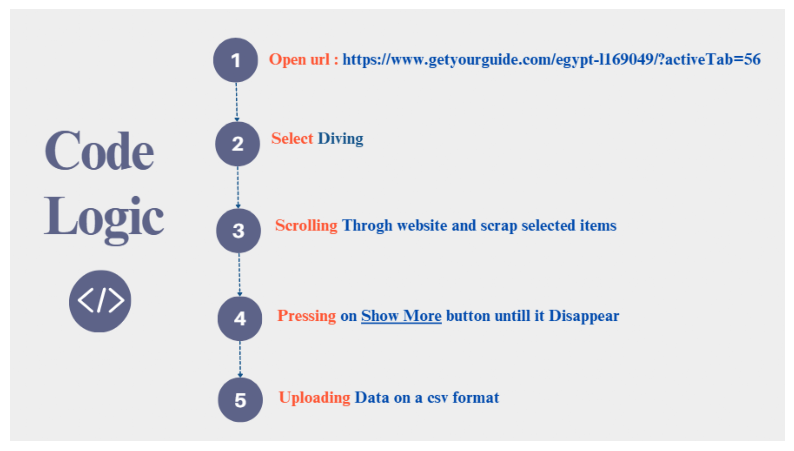

In [31]:
show_image(r"‪‪F:\Egyptopia\Activities Scrap\Logo\divingData.png")

In [32]:
# Browser Preparation
options = Options()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

try:
    url = "https://www.getyourguide.com/egypt-l169049/?activeTab=56"
    driver.get(url)

    # Wating the website for loading
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//div[@id="activities-grid"]'))
    )

    ## Pressing on Show More Button 
    while True:
        try:
            show_more_button = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.XPATH, '//button[span[contains(text(), "Show more")]]'))
            )
            driver.execute_script("arguments[0].click();", show_more_button)
            time.sleep(3)
        except:
            break  

    # Data Extraction By Items Xpath
    activities = driver.find_elements(By.XPATH, '/html/body/div[2]/div/div/main/div/div/div[4]/div/div[4]/div/section/div/article/div/a/div[1]/header/h3/span')
    images = driver.find_elements(By.XPATH, '/html/body/div[2]/div/div/main/div/div/div[4]/div/div[4]/div/section/div/article/div/a/div[1]/div[1]/div[1]/picture/img')
    ratings = driver.find_elements(By.XPATH, '/html/body/div[2]/div/div/main/div/div/div[4]/div/div[4]/div/section/div/article/div/a/div[2]/footer/div[1]/div[2]')
    prices = driver.find_elements(By.XPATH, '/html/body/div[2]/div/div/main/div/div/div[4]/div/div[4]/div/section/div/article/div/a/div[2]/footer/div[2]/div')
    links = driver.find_elements(By.XPATH, '/html/body/div[2]/div/div/main/div/div/div[4]/div/div[4]/div/section/div/article/div/a')

    # Showing the number of collected items
    print(f" total collected activities : {len(activities)}")
    print(f" total collected images  : {len(images)}")
    print(f" total collected ratings : {len(ratings)}")
    print(f" total collected prices  : {len(prices)}")
    print(f" total collected links : {len(links)}")

    # Checking Data Integrity 
    max_length = max(len(activities), len(images), len(ratings), len(prices), len(links))

    # Data Cleaning 
    clean_titles = [activities[i].text.strip() if i < len(activities) else "N/A" for i in range(max_length)]
    clean_images = [images[i].get_attribute("src") if i < len(images) else "N/A" for i in range(max_length)]
    clean_ratings = [ratings[i].text.strip() if i < len(ratings) else "N/A" for i in range(max_length)]
    clean_prices = [prices[i].text.strip() if i < len(prices) else "N/A" for i in range(max_length)]
    clean_links = [links[i].get_attribute("href") if i < len(links) else "N/A" for i in range(max_length)]

    # Images Saving 
    save_path = r"F:\Egyptopia\Activities Scrap\Diving\Diving Images"
    os.makedirs(save_path, exist_ok=True)

    # Storing Data in Dataframe
    data = []
    for i in range(max_length):
        try:
            title = clean_titles[i]
            rating = clean_ratings[i]
            price = clean_prices[i]
            link = clean_links[i]
            image_url = clean_images[i]

            # تحميل الصورة وحفظها
            if image_url != "N/A":
                img_extension = image_url.split('.')[-1].split('?')[0]
                img_filename = f"{title}.{img_extension}".replace(":", "").replace("?", "").replace("/", "").replace("\\", "")
                img_path = os.path.join(save_path, img_filename)

                img_data = requests.get(image_url).content
                with open(img_path, 'wb') as img_file:
                    img_file.write(img_data)

                print(f"✅ {title} - Image Saved")

            data.append((title, rating, price, link))

        except Exception as e:
            print(f"❌ error in {title}: {e}")
            
    diving_data = pd.DataFrame(data, columns=["Title", "Rating", "Price", "Link"])
    print("Data Collected Successfully")

finally:
    driver.quit()

 total collected activities : 71
 total collected images  : 71
 total collected ratings : 71
 total collected prices  : 71
 total collected links : 71
✅ Hurghada or Makadi: Discover the Magic of Dolphin House - Image Saved
✅ Hurghada: Luxury Cruise Trip to Orange Bay with Lunch - Image Saved
✅ Hurghada: Royal Seascope Submarine Cruise with Snorkel Stop - Image Saved
✅ Hurghada: 6 Islands Tour with Dolphin Watching & Snorkelling - Image Saved
✅ Giza: Sakkara, Memphis & Dahshur (Pyramid & Felucca Options) - Image Saved
✅ Intro Diving Beginner and Discover Red Sea Underwater - Image Saved
✅ Hurghada: Full-Day Boat Trip with 2 Scuba Dives - Image Saved
✅ Hurghada: Sindbad Submarines Red Sea Underwater Adventure - Image Saved
✅ From Sharm: Ras Muhammed & White Island By Boat & intro Dive - Image Saved
✅ Hurghada: 3-Island Tour with Dolphin Watching and Snorkeling - Image Saved
✅ Sharm: Ras Mohammed Half Day Tour by Bus & Allah's gate - Image Saved
✅ Cairo: Dinner Cruise on the Nile River - 

In [33]:
diving_data

,Title,Rating,Price,Link
0,Hurghada or Makadi: Discover the Magic of Dolp...,4.9,"From\nE£1,715\nFrom\nE£1,320\nper person",https://www.getyourguide.com/hurghada-l403/hur...
1,Hurghada: Luxury Cruise Trip to Orange Bay wit...,4.9,"From\nE£2,949\nFrom\nE£2,802\nper person",https://www.getyourguide.com/hurghada-l403/hur...
2,Hurghada: Royal Seascope Submarine Cruise with...,4.5,"From\nE£1,264\nFrom\nE£884\nper person",https://www.getyourguide.com/hurghada-l403/hur...
3,Hurghada: 6 Islands Tour with Dolphin Watching...,4.7,"From\nE£2,972\nFrom\nE£2,675\nper person",https://www.getyourguide.com/hurghada-l403/hur...
4,"Giza: Sakkara, Memphis & Dahshur (Pyramid & Fe...",4.8,"From\nE£1,364\nFrom\nE£682\nper person",https://www.getyourguide.com/cairo-l92/giza-sa...
...,...,...,...,...
66,"Hurghada: 1 day DIVING Refrechment, 1 Check & ...",5,"From\nE£7,432\nper person",https://www.getyourguide.com/hurghada-l403/hur...
67,"speedboat, snorkeling & massage on Magawish is...",4.6,"From\nE£11,434\nper group up to 2",https://www.getyourguide.com/hurghada-l403/spe...
68,From Alexandria Port: City Tour with Citadel a...,4.5,"From\nE£13,272\nper person",https://www.getyourguide.com/alexandria-l490/f...
69,Hurghada: Private Speedboat To Bayoud Islands ...,3.7,"From\nE£25,726\nper group up to 2",https://www.getyourguide.com/hurghada-l403/hur...


In [34]:
diving_data.to_csv("diving_data.csv", index=False, encoding="utf-8")

## Scrapping Camel Tours

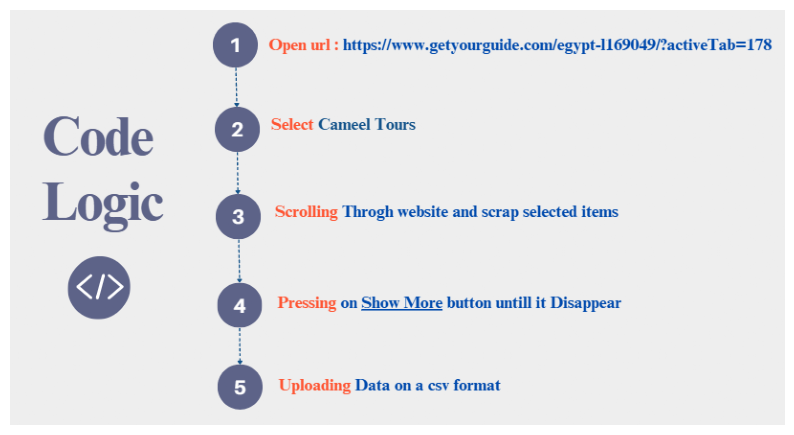

In [35]:
show_image(r"‪‪F:\Egyptopia\Activities Scrap\Logo\tour_guide.png")

In [36]:
# Browser Preparation
options = Options()
options.add_argument("--start-maximized")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

try:
    url = "https://www.getyourguide.com/egypt-l169049/?activeTab=178"
    driver.get(url)

    # Wating For Page loading
    WebDriverWait(driver, 15).until(
        EC.presence_of_element_located((By.XPATH, '//div[@id="activities-grid"]'))
    )

    ## Pressing on "Show more" button 
    while True:
        try:
            show_more_button = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.XPATH, '//button[span[contains(text(), "Show more")]]'))
            )
            driver.execute_script("arguments[0].click();", show_more_button)
            time.sleep(2)  
        except:
            break  

    # Scroll Down 
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        driver.execute_script("window.scrollBy(0, 500);") 
        time.sleep(2)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

    # Extracting Data by Their Xpath
    activities = WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.XPATH, '//article//h3/span'))
    )
    images = WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.XPATH, '//article//picture/img'))
    )
    ratings = driver.find_elements(By.XPATH, '//article//footer/div[1]/div[2]')
    prices = driver.find_elements(By.XPATH, '//article//footer/div[2]/div')
    links = driver.find_elements(By.XPATH, '//article/div/a')

    print(f" total collected activities : {len(activities)}")
    print(f" total collected images  : {len(images)}")
    print(f" total collected ratings : {len(ratings)}")
    print(f" total collected prices  : {len(prices)}")
    print(f" total collected links : {len(links)}")

    # Data Integrity Checking
    max_length = max(len(activities), len(images), len(ratings), len(prices), len(links))

    # Data Inspection and Cleaning
    clean_titles = [activities[i].text.strip() if i < len(activities) else "N/A" for i in range(max_length)]
    clean_images = [images[i].get_attribute("src") if i < len(images) else "N/A" for i in range(max_length)]
    clean_ratings = [ratings[i].text.strip() if i < len(ratings) else "N/A" for i in range(max_length)]
    clean_prices = [prices[i].text.strip() if i < len(prices) else "N/A" for i in range(max_length)]
    clean_links = [links[i].get_attribute("href") if i < len(links) else "N/A" for i in range(max_length)]

    # Image Saving
    save_path = r"F:\Egyptopia\Activities Scrap\Camel Tours\Camel Tours Images"
    os.makedirs(save_path, exist_ok=True)

    # Storing Data in Dataframe
    data = []
    for i in range(max_length):
        try:
            title = clean_titles[i]
            rating = clean_ratings[i]
            price = clean_prices[i]
            link = clean_links[i]
            image_url = clean_images[i]

            # Image loading and Saving
            if image_url != "N/A":
                img_extension = image_url.split('.')[-1].split('?')[0]
                img_filename = f"{title}.{img_extension}".replace(":", "").replace("?", "").replace("/", "").replace("\\", "")
                img_path = os.path.join(save_path, img_filename)

                img_data = requests.get(image_url).content
                with open(img_path, 'wb') as img_file:
                    img_file.write(img_data)

                print(f"✅ {title} - Image Saved")

            data.append((title, rating, price, link))

        except Exception as e:
            print(f"error in  {title}: {e}")

    camel_tour = pd.DataFrame(data, columns=["Title", "Rating", "Price", "Link"])
    print("Data Collected Successfully")
    
finally:
    driver.quit()

 total collected activities : 92
 total collected images  : 92
 total collected ratings : 91
 total collected prices  : 91
 total collected links : 92
✅ Sharm El-Sheikh: Ultimate ATV Quad, Stargazing & BBQ Dinner - Image Saved
✅ Cairo: Pyramids & Great Sphinx Private Tour with Camel Ride - Image Saved
✅ Hurghada: Desert Quad Bike Camel Ride with Optional GoPro - Image Saved
✅ Hurghada: VIP Quad, Sea, Camel, Safari, Stargazing & Dinner - Image Saved
✅ Giza Sunrise Pyramid Guided Tour With Camel Ride & Breakfast - Image Saved
✅ Hurghada: Quad Bike Tour of the Desert and Red Sea - Image Saved
✅ Hurghada: Quad Bike, Buggy, and Camel Ride & Bedouin Village - Image Saved
✅ Hurghada: Star Stargazing Desert Adventure by Jeep & Dinner - Image Saved
✅ Hurghada: Desert Quad Bike and Buggy Adventure with Transfer - Image Saved
✅ From Cairo: Desert Safari, Camel Ride, Magic Lake, & Lunch - Image Saved
✅ Hurghada: Sea & Desert Camel Ride w/Dinner, Show, Stargazing - Image Saved
✅ Cairo: Pyramids, Ca

In [37]:
camel_tour = camel_tour[~camel_tour.eq("N/A").any(axis=1)]

In [38]:
camel_tour

,Title,Rating,Price,Link
0,"Sharm El-Sheikh: Ultimate ATV Quad, Stargazing...",4.8,"From\nE£2,001\nFrom\nE£1,000\nper person",https://www.getyourguide.com/sharm-el-sheikh-l...
1,Cairo: Pyramids & Great Sphinx Private Tour wi...,4.9,"From\nE£1,158\nFrom\nE£1,042\nper person",https://www.getyourguide.com/cairo-l92/private...
2,Hurghada: Desert Quad Bike Camel Ride with Opt...,4.5,From\nE£886\nFrom\nE£443\nper person,https://www.getyourguide.com/hurghada-l403/hur...
3,"Hurghada: VIP Quad, Sea, Camel, Safari, Starga...",4.3,From\nE£545\nFrom\nE£327\nper person,https://www.getyourguide.com/hurghada-l403/hur...
4,Giza Sunrise Pyramid Guided Tour With Camel Ri...,4.8,"From\nE£2,046\nFrom\nE£1,023\nper person",https://www.getyourguide.com/cairo-l92/giza-su...
...,...,...,...,...
86,"VIP Cairo Experience: Pyramids, ATV Adventure ...",4.3,"From\nE£12,278\nFrom\nE£9,208\nper person",https://www.getyourguide.com/cairo-l92/vip-cai...
87,"Hurghada: 4 Days Tour Horse, Camel, Spa, ATV, ...",4.3,"From\nE£1,580\nper person",https://www.getyourguide.com/makadi-bay-l4675/...
88,Desert Safari Around The Pyramids of Giza With...,4,"From\nE£2,182\nFrom\nE£1,309\nper person",https://www.getyourguide.com/giza-governorate-...
89,"Makadi Bay: 2H Quad Bike, Camel, Stargazing, D...",5,"From\nE£3,423\nper person",https://www.getyourguide.com/makadi-bay-l4675/...


In [39]:
camel_tour.to_csv("camel_tour.csv", index=False, encoding="utf-8")

## Scrapping Submarine Tours 

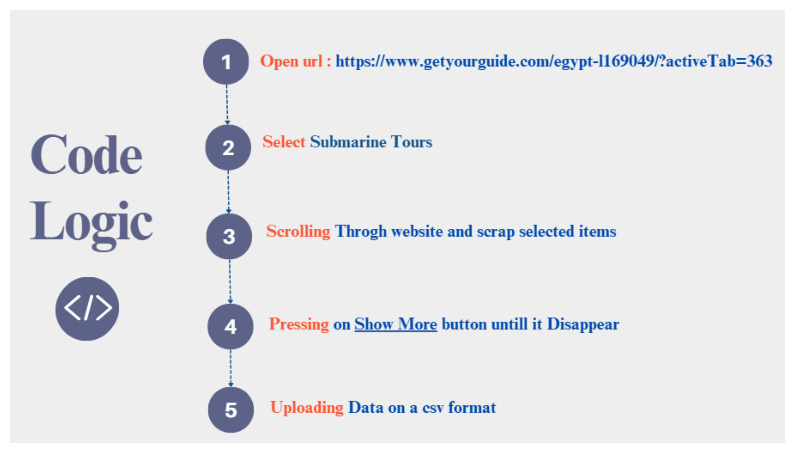

In [40]:
show_image(r"‪‪F:\Egyptopia\Activities Scrap\Logo\submarine_tours.png")

In [41]:
# Browser Preparation
options = Options()
options.add_argument("--start-maximized")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

try:
    url = "https://www.getyourguide.com/egypt-l169049/?activeTab=363"
    driver.get(url)

    # Watting Untill Page load
    WebDriverWait(driver, 15).until(
        EC.presence_of_element_located((By.XPATH, '//div[@id="activities-grid"]'))
    )

    ## Pressing "Show more" 
    while True:
        try:
            show_more_button = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.XPATH, '//button[span[contains(text(), "Show more")]]'))
            )
            driver.execute_script("arguments[0].click();", show_more_button)
            time.sleep(2)
        except:
            break  

    # Scrolling Down Slowly 
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        driver.execute_script("window.scrollBy(0, 500);")
        time.sleep(2)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

    # Extracting Data by Xpath
    activities = WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.XPATH, '//article//h3/span'))
    )
    images = WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.XPATH, '//article//picture/img'))
    )
    ratings = driver.find_elements(By.XPATH, '//article//footer/div[1]/div[2]')
    prices = driver.find_elements(By.XPATH, '//article//footer/div[2]/div')
    links = driver.find_elements(By.XPATH, '//article/div/a')

    print(f" total collected activities : {len(activities)}")
    print(f" total collected images  : {len(images)}")
    print(f" total collected ratings : {len(ratings)}")
    print(f" total collected prices  : {len(prices)}")
    print(f" total collected links : {len(links)}")

    # Checking Data Integrity 
    max_length = max(len(activities), len(images), len(ratings), len(prices), len(links))

    # Data Cleaning 
    clean_titles = [activities[i].text.strip() if i < len(activities) else "N/A" for i in range(max_length)]
    clean_images = [images[i].get_attribute("src") if i < len(images) else "N/A" for i in range(max_length)]
    clean_ratings = [ratings[i].text.strip() if i < len(ratings) else "N/A" for i in range(max_length)]
    clean_prices = [prices[i].text.strip() if i < len(prices) else "N/A" for i in range(max_length)]
    clean_links = [links[i].get_attribute("href") if i < len(links) else "N/A" for i in range(max_length)]

    # Images Saving
    save_path = r"F:\Egyptopia\Activities Scrap\Submarine Tours\Submarine Tours Images"
    os.makedirs(save_path, exist_ok=True)

    # Data Storing 
    data = []
    for i in range(max_length):
        try:
            title = clean_titles[i]
            rating = clean_ratings[i]
            price = clean_prices[i]
            link = clean_links[i]
            image_url = clean_images[i]

            # Image loading and Saving 
            if image_url != "N/A":
                img_extension = image_url.split('.')[-1].split('?')[0]
                img_filename = f"{title}.{img_extension}".replace(":", "").replace("?", "").replace("/", "").replace("\\", "")
                img_path = os.path.join(save_path, img_filename)

                img_data = requests.get(image_url).content
                with open(img_path, 'wb') as img_file:
                    img_file.write(img_data)

                print(f"✅ {title} - Image Saved")

            data.append((title, rating, price, link))

        except Exception as e:
            print(f"❌ error in {title}: {e}")

    submarine_tour = pd.DataFrame(data, columns=["Title", "Rating", "Price", "Link"])
    print("Data Collected Successfully")

finally:
    driver.quit()

 total collected activities : 18
 total collected images  : 18
 total collected ratings : 18
 total collected prices  : 18
 total collected links : 18
✅ Hurghada: Royal Seascope Submarine Cruise with Snorkel Stop - Image Saved
✅ Sharm El-Sheikh: Seascope Submarine boat cruise with pickup - Image Saved
✅ Hurghada: Semi-Submarine Boat Tour w/ Snorkeling & Transfer - Image Saved
✅ Hurghada: Sindbad Submarines Red Sea Underwater Adventure - Image Saved
✅ Hurghada: Panoramic Semi-Submarine Cruise with Snorkeling - Image Saved
✅ Safaga/Makadi Bay: Panorama Submarine with Snorkeling Tour - Image Saved
✅ Marsa Alam: Royal Seascope Submarine Cruise with Pickup - Image Saved
✅ Hurghada: Paradise Island w/ Snorkeling & Opt Semi-Submarine - Image Saved
✅ From Safaga: Royal Seascope Submarine with Snorkeling - Image Saved
✅ Sharm El-Sheikh: Royal Seascope Submarine Cruise with Pickup - Image Saved
✅ Hurghada: Empire Submarine Boat Trip with Snorkel and Drinks - Image Saved
✅ From El Gouna: Royal Se

In [42]:
submarine_tour

,Title,Rating,Price,Link
0,Hurghada: Royal Seascope Submarine Cruise with...,4.5,"From\nE£1,264\nFrom\nE£884\nper person",https://www.getyourguide.com/hurghada-l403/hur...
1,Sharm El-Sheikh: Seascope Submarine boat cruis...,4.5,"From\nE£2,370\nFrom\nE£1,919\nper person",https://www.getyourguide.com/sharm-el-sheikh-l...
2,Hurghada: Semi-Submarine Boat Tour w/ Snorkeli...,4.2,From\nE£421\nFrom\nE£316\nper person,https://www.getyourguide.com/hurghada-l403/hur...
3,Hurghada: Sindbad Submarines Red Sea Underwate...,5,"From\nE£3,944\nFrom\nE£3,550\nper person",https://www.getyourguide.com/hurghada-l403/hur...
4,Hurghada: Panoramic Semi-Submarine Cruise with...,4.5,"From\nE£1,843\nFrom\nE£921\nper person",https://www.getyourguide.com/hurghada-l403/pan...
5,Safaga/Makadi Bay: Panorama Submarine with Sno...,4.6,"From\nE£1,843\nFrom\nE£921\nper person",https://www.getyourguide.com/makadi-bay-l4675/...
6,Marsa Alam: Royal Seascope Submarine Cruise wi...,4.3,"From\nE£2,633\nFrom\nE£2,422\nper person",https://www.getyourguide.com/marsa-alam-l422/r...
7,Hurghada: Paradise Island w/ Snorkeling & Opt ...,4.7,"From\nE£1,843\nFrom\nE£921\nper person",https://www.getyourguide.com/hurghada-l403/hur...
8,From Safaga: Royal Seascope Submarine with Sno...,4.6,"From\nE£1,158\nFrom\nE£927\nper person",https://www.getyourguide.com/port-safaga-l1356...
9,Sharm El-Sheikh: Royal Seascope Submarine Crui...,3.9,"From\nE£2,896\nFrom\nE£2,317\nper person",https://www.getyourguide.com/sharm-el-sheikh-l...


In [43]:
submarine_tour.to_csv("submarine_tour.csv", index=False, encoding="utf-8")